# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [1]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

/tmp/ipykernel_9301/3936888326.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face(gray=True)


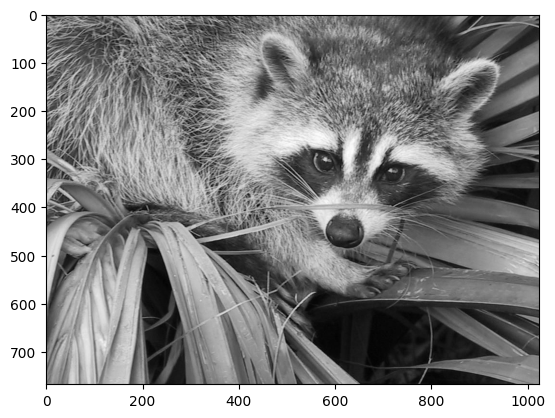

In [2]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

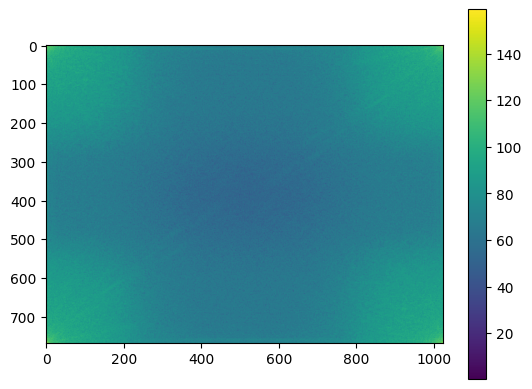

In [3]:
Y = np.fft.fft2(X)
freq_db = 20*np.log10(abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()

Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

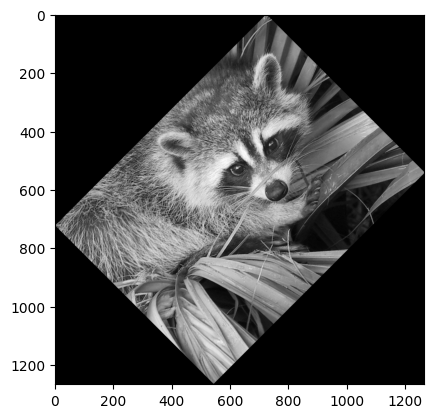

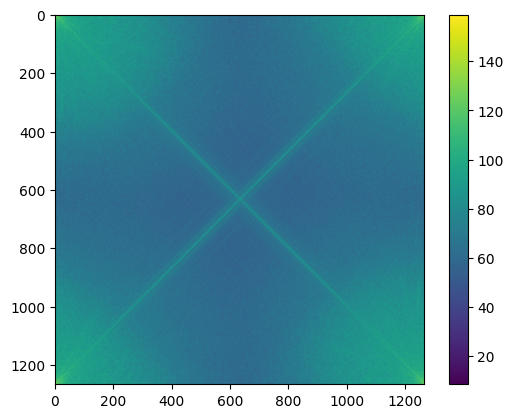

In [4]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()

Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

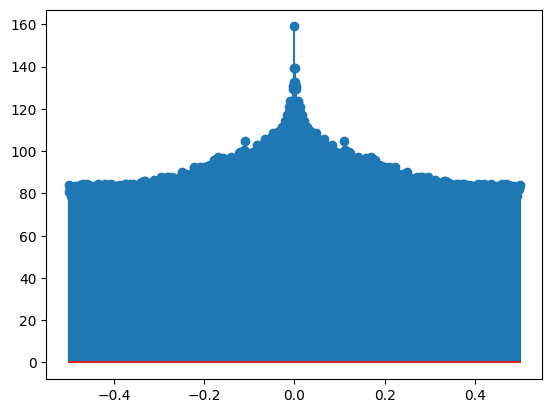

In [5]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

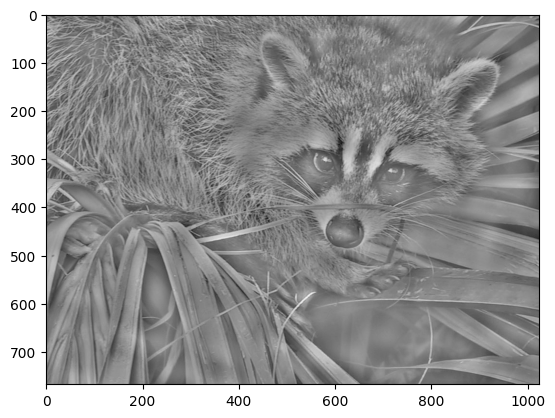

In [6]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

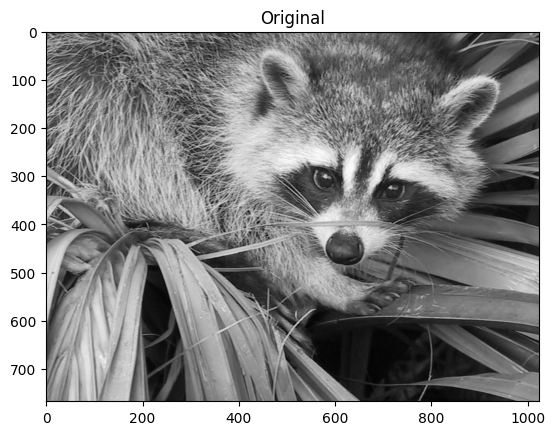

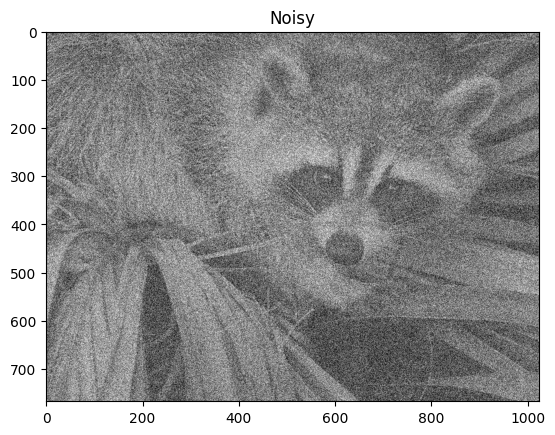

In [7]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()

# Sarcini

1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

4. [4p] Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 5](https://cs.unibuc.ro/~pirofti/ps/ps-lab-5.pdf).

Rezolvare 1

In [16]:
t1 = np.linspace(0, 10, 100)
t2 = np.linspace(0, 10, 100)

* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$

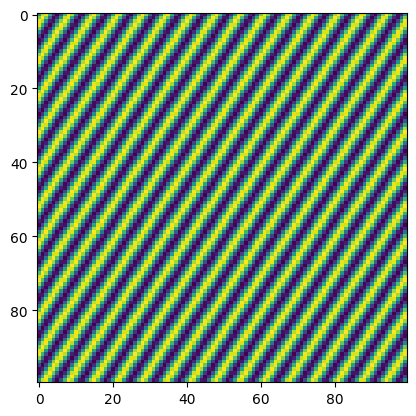

In [17]:
s1 = []
for n1 in t1:
    s1.append([])
    i = np.where(t1 == n1)[0][0]
    for n2 in t2:
        s1[i].append(np.sin(2 * np.pi * n1 + 3 * np.pi * n2))

plt.imshow(s1)

**Explicatie**: Imaginea este in dungi oblice de valori 0 sau 1 

* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$

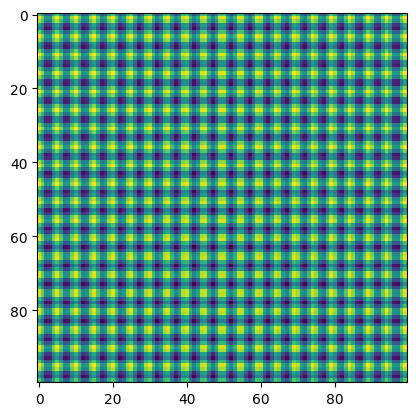

In [19]:
s2 = []
for n1 in t1:
    s2.append([])
    i = np.where(t1 == n1)[0][0]
    for n2 in t2:
        s2[i].append(np.sin(4 * np.pi * n1) + np.cos(4 * np.pi * n2))

plt.imshow(s2)

**Explicatie**: imaginea are patratele ca o tabla de sah de valori 0 sau 1, date fiind de adunarea sinusului cu cosinusul

* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

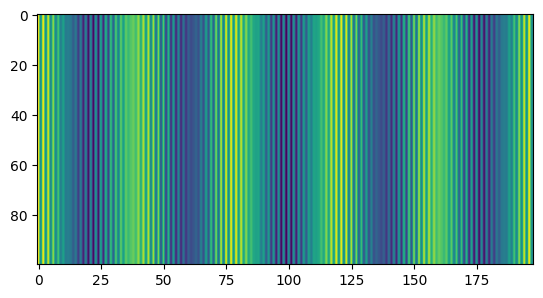

In [27]:
s3 = np.zeros((len(t1), len(t2)))
s3[0][5] = s3[0][len(t1) - 5] = 1

s3 = np.fft.irfft2(s3)

plt.imshow(s3)

**Exlicatie**: domeniul frecventa are 2 valori de 1 pe prima linie, situate simetric fata de mijloc, asadar domeniul timp are un fenomen de banding vertical

* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

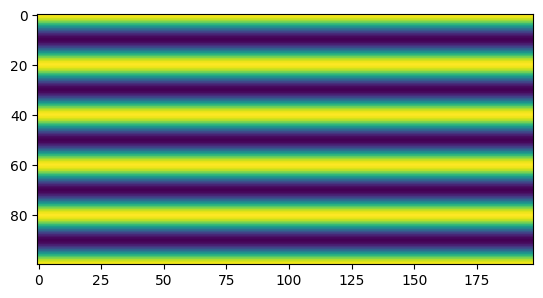

In [28]:
s4 = np.zeros((len(t1), len(t2)))
s4[5][0] = s4[len(t2) - 5][0] = 1

s4 = np.fft.irfft2(s4)

plt.imshow(s4)

**Exlicatie**: domeniul frecventa are 2 valori de 1 pe prima coloana, situate simetric fata de mijloc, asadar domeniul timp are un fenomen de banding orizontal

* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

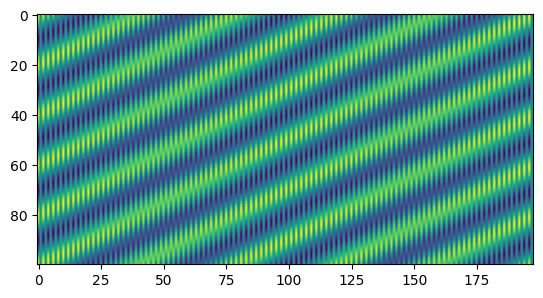

In [29]:
s5 = np.zeros((len(t1), len(t2)))
s5[5][5] = s5[len(t1) - 5][len(t2) - 5] = 1

s5 = np.fft.irfft2(s5)

plt.imshow(s5)

**Exlicatie**: domeniul frecventa are 2 valori de 1 situate simetric pe diagonala principala, asadar domeniul timp are un banding diagonal

Rezolvare 2: Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

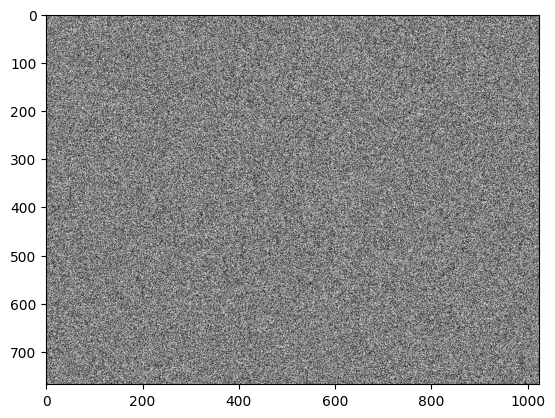

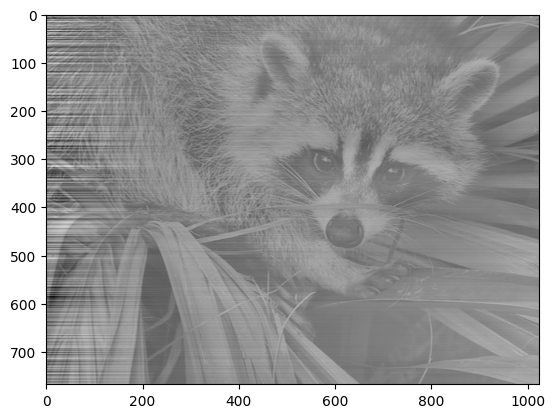

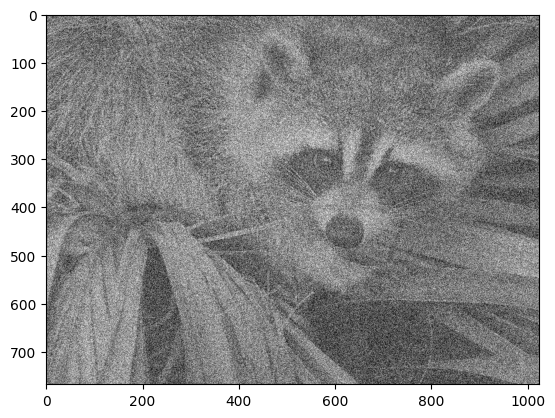

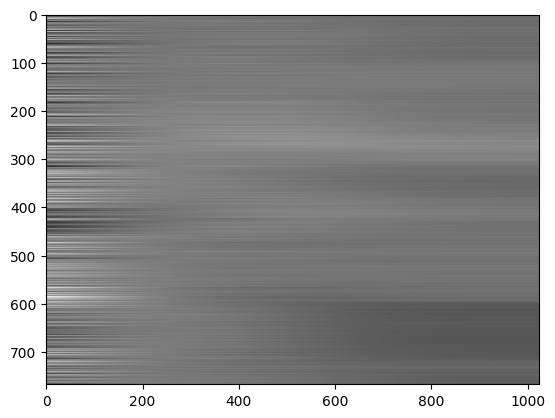

In [69]:
snr_original = np.abs(X.mean()) / np.abs(noise.mean())
# print(snr_original)
snr = np.mean(snr_original) / 2
# print(snr)

Y_noisy = np.fft.fft2(X_noisy)

from scipy import signal
b, a = signal.butter(3, 1/snr, 'low', analog=False)
X_2_nonoise = signal.filtfilt(b, a, X_noisy)

X1 = X - X_noisy
X2 = X - X_2_nonoise


plt.imshow(X1, cmap=plt.cm.gray)
plt.show()
plt.imshow(X2, cmap=plt.cm.gray)
plt.show()

plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.show()
plt.imshow(X_2_nonoise, cmap=plt.cm.gray)
plt.show()

Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

In [61]:
# Compute SNR from X_2_nonoise and X
snr = np.mean(X**2)/np.mean((X - X_2_nonoise)**2)
print(f"Dupa: {snr}")

snr_old = np.mean(X**2)/np.mean((X - X_noisy)**2)
print(f"Inainte: {snr_old}")

Dupa: 0.07326044320913938
Inainte: 0.007947650519302504


 Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 5](https://cs.unibuc.ro/~pirofti/ps/ps-lab-5.pdf).